# **KAN COMPARE** #


#Step 1: Installing Hugging Face transformers and torchinfo

In [1]:
!pip  install torchinfo torchmetrics accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 14.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-many

# Step 2: Mount Google Drive

In [2]:
#@m l modelrkdown # Connect Google Drive
from google.colab import drive
from IPython.display import clear_output
import ipywidgets as widgets
def inf(msg, style, wdth): inf = widgets.Button(description=msg, disabled=True, button_style=style, layout=widgets.Layout(min_width=wdth));display(inf)
Shared_Drive = "" #@param {type:"string"}
#@markdown - Leave empty if you're not using a shared drive

print("Connecting...")
drive.mount('/content/gdrive')

if Shared_Drive!="" and os.path.exists("/content/gdrive/Shareddrives"):
  mainpth="Shareddrives/"+Shared_Drive
else:
  mainpth="MyDrive"

clear_output()
inf('\u2714 Done','success', '50px')

#@markdown ---

Button(button_style='success', description='✔ Done', disabled=True, layout=Layout(min_width='50px'), style=But…

, ru#@m l modelrkdown # Connect Google Drive
from google.colab import drive
from IPython.display import clear_output
import ipywidgets as widgets
def inf(msg, style, wdth): inf = widgets.Button(description=msg, disabled=True, button_style=style, layout=widgets.Layout(min_width=wdth));display(inf)
Shared_Drive = "" #@param {type:"string"}
#@markdown - Leave empty if you're not using a shared drive

print("Connecting...")
drive.mount('/content/gdrive')

if Shared_Drive!="" and os.path.exists("/content/gdrive/Shareddrives"):
  mainpth="Shareddrives/"+Shared_Drive
else:
  mainpth="MyDrive"

clear_output()
inf('\u2714 Done','success', '50px')

#@markdown ---

In [3]:
%cd /content/gdrive/MyDrive/FAIR/2024/


/content/gdrive/MyDrive/FAIR/2024


In [ ]:
!wget  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2024-06-16 03:16:34--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M   106MB/s    in 1.5s    

2024-06-16 03:16:36 (106 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [ ]:
!tar -xvzf ./cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('./cifar-10-batches-py'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./cifar-10-batches-py/test_batch
./cifar-10-batches-py/data_batch_3
./cifar-10-batches-py/data_batch_2
./cifar-10-batches-py/data_batch_5
./cifar-10-batches-py/data_batch_1
./cifar-10-batches-py/data_batch_4
./cifar-10-batches-py/batches.meta


In [5]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score
import torchvision.datasets as datasets

import math
import wandb

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batchSize = 4

dataset = torchvision.datasets.CIFAR10(root="./", train=True, download=False, transform=transform) #transforms.ToTensor())
testset = torchvision.datasets.CIFAR10(root="./", train=False, download=False, transform=transform) #transforms.ToTensor())

In [7]:


trainset, validateset = random_split(dataset, [45000, 5000])

trainloader = DataLoader(trainset, batchSize, shuffle=True)
validateloader = DataLoader(validateset, batchSize, shuffle=True)
testloader = DataLoader(testset, batch_size=batchSize, shuffle=False)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [32]:
!pip install wandb

  Using cached wandb-0.17.4-py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.9 MB)


In [40]:

epochs = 10
# Initialize wandb
wandb.init(project="fair2024_mlp", entity="toandang76")

# Configurations and hyperparameters tracked by wandb
wandb.config = {
  "learning_rate": 0.001,
  "epochs": epochs,
  "batch_size": len(trainloader.dataset) / len(trainloader)
}

AttributeError: module 'wandb' has no attribute 'init'

In [ ]:
# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# batch_size = 4

# trainset = torchvision.datasets.CIFAR10(root='/content/gdrive/MyDrive/FAIR/2024/cifar-10-batches-py', train=True,
#                                         download=False, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
#                                           shuffle=True, num_workers=2)

# testset = torchvision.datasets.CIFAR10(root='/content/gdrive/MyDrive/FAIR/2024/cifar-10-batches-py', train=False,
#                                        download=False, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
#                                          shuffle=False, num_workers=2)

# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

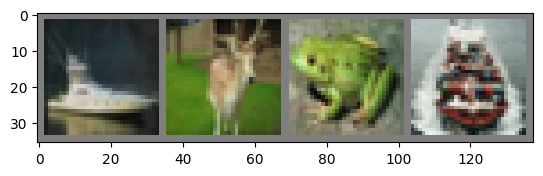

ship  deer  frog  ship 


In [9]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)


# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batchSize)))

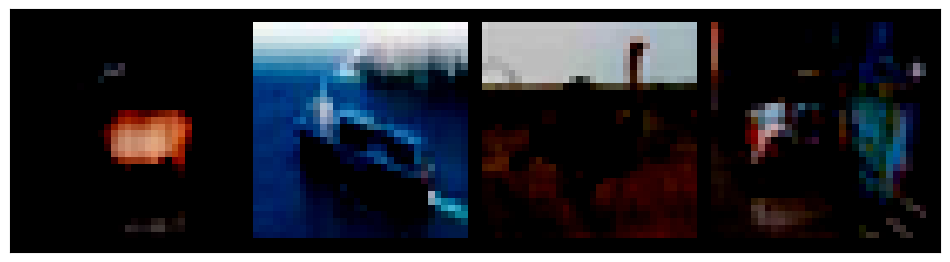

In [10]:
for images, labels in trainloader:
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=20).permute(1, 2, 0))
    break

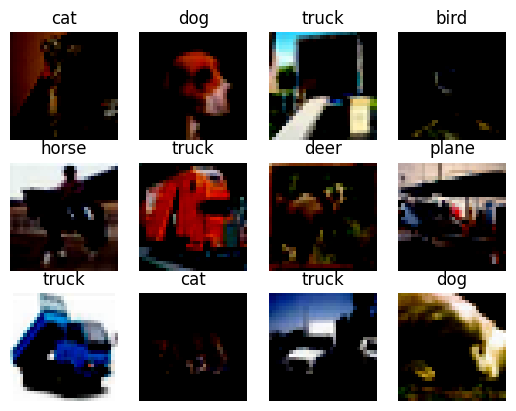

In [11]:
for i in range(0, 12):
    img, label = validateset[i]
    plt.subplot(3,4,i+1)
    plt.title(classes[label])
    plt.axis('off')
    plt.imshow(img.permute(1, 2, 0))

### MLP

In [12]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.to(device)


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [13]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### train model

In [41]:
%%time
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device) #data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            # wandb.log({"epoch": epoch + 1, "loss": avg_loss})
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.714
[1,  4000] loss: 1.603
[1,  6000] loss: 1.554
[1,  8000] loss: 1.489
[1, 10000] loss: 1.432
[2,  2000] loss: 1.359
[2,  4000] loss: 1.296
[2,  6000] loss: 1.284
[2,  8000] loss: 1.278
[2, 10000] loss: 1.275
[3,  2000] loss: 1.162
[3,  4000] loss: 1.145
[3,  6000] loss: 1.156
[3,  8000] loss: 1.163
[3, 10000] loss: 1.139
[4,  2000] loss: 1.043
[4,  4000] loss: 1.058
[4,  6000] loss: 1.079
[4,  8000] loss: 1.070
[4, 10000] loss: 1.038
[5,  2000] loss: 0.960
[5,  4000] loss: 0.988
[5,  6000] loss: 1.013
[5,  8000] loss: 0.996
[5, 10000] loss: 0.998
[6,  2000] loss: 0.922
[6,  4000] loss: 0.925
[6,  6000] loss: 0.925
[6,  8000] loss: 0.944
[6, 10000] loss: 0.952
[7,  2000] loss: 0.855
[7,  4000] loss: 0.890
[7,  6000] loss: 0.889
[7,  8000] loss: 0.894
[7, 10000] loss: 0.898
[8,  2000] loss: 0.819
[8,  4000] loss: 0.835
[8,  6000] loss: 0.845
[8,  8000] loss: 0.864
[8, 10000] loss: 0.857
[9,  2000] loss: 0.768
[9,  4000] loss: 0.807
[9,  6000] loss: 0.798
[9,  8000] 

In [43]:
PATH = './mlp_cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [16]:
#Load model
PATH = './mlp_cifar_net.pth'
net = Net()
net.load_state_dict(torch.load(PATH, map_location=torch.device(device)))
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [14]:
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


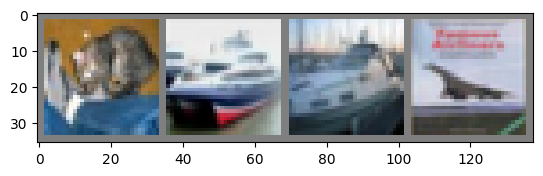

GroundTruth:  cat   ship  ship  plane


In [17]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [18]:
correct = 0
total = 0
f1_test = 0
precision_test = 0
recall_test = 0
i=0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        f1_test += (f1_score(labels, predicted, average='weighted'))
        precision_test += (precision_score(labels, predicted, average='weighted'))
        recall_test += (recall_score(labels, predicted, average='weighted'))
        i+=1

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
print(f'F1 score: {100 * f1_test/i}')
print(f'Precision: {100 * precision_test/i}')
print(f'Recall: {100 *recall_test/i}')


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classificat

Accuracy of the network on the 10000 test images: 63 %
F1 score: 62.99833333333333
Precision: 65.86499999999995
Recall: 63.08


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is i

In [49]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 71.5 %
Accuracy for class: car   is 80.8 %
Accuracy for class: bird  is 48.3 %
Accuracy for class: cat   is 32.5 %
Accuracy for class: deer  is 55.7 %
Accuracy for class: dog   is 43.8 %
Accuracy for class: frog  is 72.3 %
Accuracy for class: horse is 71.4 %
Accuracy for class: ship  is 82.8 %
Accuracy for class: truck is 71.7 %


### Confusion Matrix

In [50]:
def predictImage(img, model):

    xb = img.unsqueeze(0)
    yb = model(xb)
    _, pred = torch.max(yb, dim=1)

    return pred[0].item()

In [60]:
predictions = np.empty((0, len(testset)), np.int32)
actualValues = np.empty((0, len(testset)), np.int32)

with torch.no_grad():
    for i in range(0, len(testset)):
    # for data in testset:
        testImg, testLabel = testset[i]

        predictedValue = predictImage(testImg, net.to(device))

        predictions = np.append(predictions, predictedValue)
        actualValues = np.append(actualValues, testLabel)

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [55]:
confusionMatrix = confusion_matrix(actualValues, predictions)

confusionMatrixDf = pd.DataFrame(confusionMatrix, index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(confusionMatrixDf, annot=True, cmap='Blues', fmt='g')

ValueError: multilabel-indicator is not supported